In [36]:
import pandas as pd
import random
from datetime import datetime, timedelta

# generate sample data
locations = ['Downtown','Uptown','Midtown','Airport','Harbor']
data = []

for i in range(100):
    pickup_time = datetime(2023,5,1,random.randint(7,22),random.randint(0,59))
    delivery_time = pickup_time + timedelta(minutes = random.randint(15,90))
    pickup_location = random.choice(locations)
    drop_location = random.choice(locations)
    distance_km = round(random.uniform(2,15),2)

    data.append([f'ORD{i+1}',pickup_time, delivery_time, pickup_location, drop_location, distance_km])

df = pd.DataFrame(data, columns=['order_id', 'pickup_time', 'delivery_time', 'pickup_location', 'drop_location', 'distance_km'])
df.to_csv('delivery_data.csv', index=False)
df.head()

,order_id,pickup_time,delivery_time,pickup_location,drop_location,distance_km
0,ORD1,2023-05-01 08:17:00,2023-05-01 09:25:00,Downtown,Midtown,14.02
1,ORD2,2023-05-01 18:43:00,2023-05-01 20:10:00,Airport,Downtown,2.69
2,ORD3,2023-05-01 20:46:00,2023-05-01 21:21:00,Midtown,Downtown,8.81
3,ORD4,2023-05-01 11:46:00,2023-05-01 13:06:00,Midtown,Uptown,9.65
4,ORD5,2023-05-01 10:54:00,2023-05-01 11:19:00,Uptown,Airport,5.93


In [38]:
#Use API to import data from weatherdata

import requests

api_key = "b381a8508aef0c1d96fa2c7abdaf5e3b"
city = "Toronto"
data = "2023-05-01"

url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

response = requests.get(url)
weather_data = response.json()
weather_data

{'coord': {'lon': -79.4163, 'lat': 43.7001},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 25.12,
  'feels_like': 25.46,
  'temp_min': 24.55,
  'temp_max': 26.08,
  'pressure': 1016,
  'humidity': 68,
  'sea_level': 1016,
  'grnd_level': 1001},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 160},
 'clouds': {'all': 40},
 'dt': 1752006300,
 'sys': {'type': 1,
  'id': 718,
  'country': 'CA',
  'sunrise': 1751967853,
  'sunset': 1752022856},
 'timezone': -14400,
 'id': 6167865,
 'name': 'Toronto',
 'cod': 200}

In [40]:
#Load and prcess data
df = pd.read_csv('delivery_data.csv')
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['delivery_time'] = pd.to_datetime(df['delivery_time'])
df['duration_minutes'] = (df['delivery_time'] - df['pickup_time']).dt.total_seconds() / 60
df.head()

,order_id,pickup_time,delivery_time,pickup_location,drop_location,distance_km,duration_minutes
0,ORD1,2023-05-01 08:17:00,2023-05-01 09:25:00,Downtown,Midtown,14.02,68.0
1,ORD2,2023-05-01 18:43:00,2023-05-01 20:10:00,Airport,Downtown,2.69,87.0
2,ORD3,2023-05-01 20:46:00,2023-05-01 21:21:00,Midtown,Downtown,8.81,35.0
3,ORD4,2023-05-01 11:46:00,2023-05-01 13:06:00,Midtown,Uptown,9.65,80.0
4,ORD5,2023-05-01 10:54:00,2023-05-01 11:19:00,Uptown,Airport,5.93,25.0


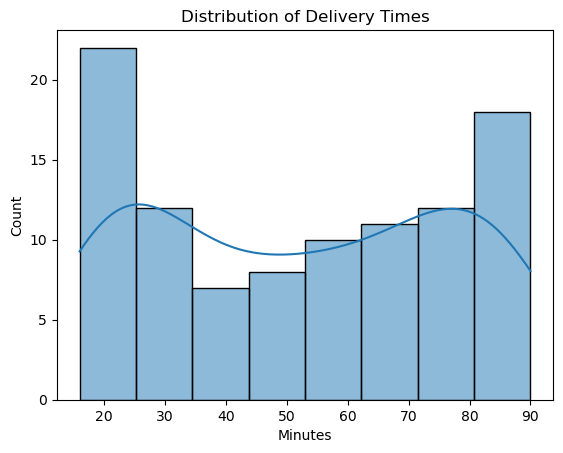

In [42]:
#Visualization



import matplotlib.pyplot as plt
import seaborn as sns

# Plot delivery duration distribution
sns.histplot(df['duration_minutes'], kde=True)
plt.title("Distribution of Delivery Times")
plt.xlabel("Minutes")
plt.show()

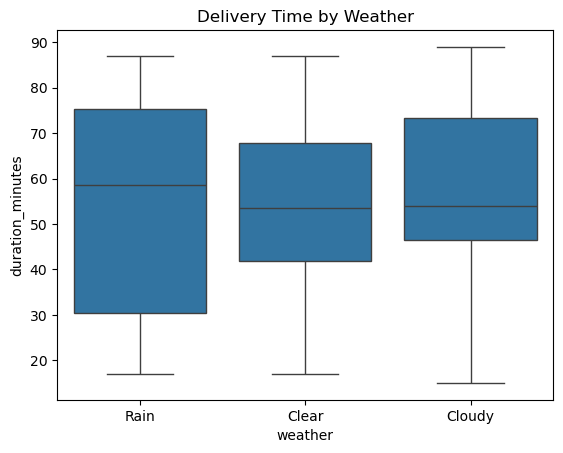

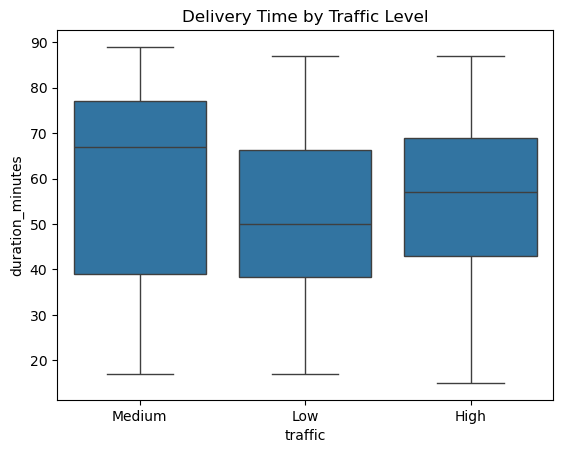

In [34]:
#Add Weather or Traffic Tags (Simple Version)
import random
df['weather'] = [random.choice(['Clear', 'Rain', 'Cloudy']) for _ in range(len(df))]
df['traffic'] = [random.choice(['Low', 'Medium', 'High']) for _ in range(len(df))]

sns.boxplot(x='weather', y='duration_minutes', data=df)
plt.title("Delivery Time by Weather")
plt.show()

sns.boxplot(x='traffic', y='duration_minutes', data=df)
plt.title("Delivery Time by Traffic Level")
plt.show()